In [1]:
from ogdf_python import *

Tile_length = 100.0

cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/basic/graph_generators/deterministic.h")
cppinclude("ogdf/fileformats/GraphIO.h")
cppinclude("ogdf/orthogonal/OrthoLayout.h")
cppinclude("ogdf/planarity/EmbedderMinDepthMaxFaceLayers.h")
cppinclude("ogdf/planarity/PlanarSubgraphFast.h")
cppinclude("ogdf/planarity/PlanarizationLayout.h")
cppinclude("ogdf/planarity/SubgraphPlanarizer.h")
cppinclude("ogdf/planarity/VariableEmbeddingInserter.h")

# cppinclude("ogdf/layered/SugiyamaLayout.h")

ogdf.EdgeArrow

G = ogdf.Graph()
# Define the number of vertices
N = 16
T = 16 # 1024/4/16=16

# Create the nodes
N_nodes = [G.newNode() for _ in range(N)]
T_nodes = [G.newNode() for _ in range(T)]

# Create two edges between each pair of nodes
for t in range(T):
    for n in range(N):
        G.newEdge(T_nodes[t], N_nodes[n])
        G.newEdge(T_nodes[t], N_nodes[n])

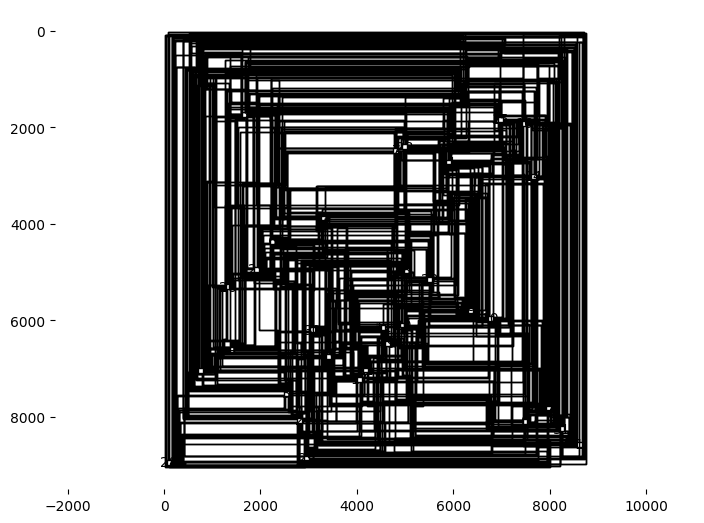

In [2]:
GA = ogdf.GraphAttributes(G, ogdf.GraphAttributes.all)
# define graph attributes
GA.directed=False

for n in G.nodes:
    GA.label[n] = "%s" % n.index()
    GA.width[n] = Tile_length
    GA.height[n] = Tile_length

for e in G.edges:
    GA.arrowType[e] =0

# SL = ogdf.PlanarizationLayout()
# SL.call(GA)
# GA

# Initialize layout components
pl = ogdf.PlanarizationLayout()
crossMin = ogdf.SubgraphPlanarizer()
ps = ogdf.PlanarSubgraphFast[int]()
ps.runs(100)
ves = ogdf.VariableEmbeddingInserter()
ves.removeReinsert(ogdf.RemoveReinsertType.All)

# Set up PlanarizationLayout components
crossMin.setSubgraph(ps)
crossMin.setInserter(ves)
pl.setCrossMin(crossMin)

# emb = ogdf.EmbedderMinDepthMaxFaceLayers()
# pl.setEmbedder(emb)

ol = ogdf.OrthoLayout()
ol.separation(10.0)
ol.cOverhang(10.0)

pl.setPlanarLayouter(ol)

pl.call(GA)
GA

In [3]:
pl.numberOfCrossings()

12600

In [4]:
ogdf.GraphIO.write(GA, "16_complete.gml")

True

In [5]:
def calculate_edge_length(edge):
    length = 0
    points = edge['graphics']['Line']
    for i in range(len(points) - 1):
        x1, y1 = points[i]['x'], points[i]['y']
        x2, y2 = points[i + 1]['x'], points[i + 1]['y']
        length += abs(x2 - x1) + abs(y2 - y1)
    return length


def read_x_y(line):
    # e.g., line = '\t\t\t\tpoint [ x 230.0000000000 y 540.0000000000 ]\n'
    # Extract x and y values without using re
    start_index = line.find('x') + 1
    end_index = line.find('y')
    x_str = line[start_index:end_index].strip()
    y_str = line[end_index + 1 : -3].strip()  # -3 to exclude the closing bracket and newline
    # Convert to float
    x = float(x_str)
    y = float(y_str)
    return(x, y)


with open('16_complete.gml', 'r') as file:
    lines = file.readlines()

edges = []
current_edge = None

for line in lines:
    if 'edge' in line:
        current_edge = {'graphics': {'Line': []}}
    elif 'source' in line and current_edge is not None:
        current_edge['source'] = int(line.split()[1])
    elif 'target' in line and current_edge is not None:
        current_edge['target'] = int(line.split()[1])
    elif (']' in line) and (current_edge is not None) and (not ('point' in line)):
        edges.append(current_edge)
        current_edge = None
    elif 'point' in line and current_edge is not None:
        # Extract coordinates of points in the line segment
        coordinates = read_x_y(line)
        point = {'x': coordinates[0], 'y': coordinates[1]}
        current_edge['graphics']['Line'].append( point)

edge_lengths=[]
for edge in edges:
    length = calculate_edge_length(edge)
    edge_lengths.append(length)
    print(f"Edge from {edge['source']} to {edge['target']} has length: {length}")


Edge from 16 to 0 has length: 7187.0689655174
Edge from 16 to 0 has length: 7156.8965517241
Edge from 16 to 1 has length: 7700.000000000001
Edge from 16 to 1 has length: 7693.1034482758005
Edge from 16 to 2 has length: 20368.1034482759
Edge from 16 to 2 has length: 20533.6206896552
Edge from 16 to 3 has length: 16475.000000000102
Edge from 16 to 3 has length: 18688.7931034483
Edge from 16 to 4 has length: 13191.3793103448
Edge from 16 to 4 has length: 13335.3448275862
Edge from 16 to 5 has length: 6620.689655172301
Edge from 16 to 5 has length: 6743.1034482759005
Edge from 16 to 6 has length: 7854.3103448275
Edge from 16 to 6 has length: 7664.655172413701
Edge from 16 to 7 has length: 3113.7931034483
Edge from 16 to 7 has length: 3095.6896551724
Edge from 16 to 8 has length: 5472.413793103401
Edge from 16 to 8 has length: 5392.2413793103005
Edge from 16 to 9 has length: 4820.6896551725
Edge from 16 to 9 has length: 4859.482758620701
Edge from 16 to 10 has length: 4616.379310344801
Edge

In [6]:
Tile_real_length = 30 #[mm]
ratio=Tile_real_length/Tile_length
for i in range(len(edge_lengths)):
    edge_lengths[i]*=ratio

In [7]:
edge_lengths

[2156.12068965522,
 2147.06896551723,
 2310.0,
 2307.93103448274,
 6110.431034482769,
 6160.08620689656,
 4942.50000000003,
 5606.63793103449,
 3957.41379310344,
 4000.6034482758596,
 1986.2068965516903,
 2022.93103448277,
 2356.29310344825,
 2299.39655172411,
 934.13793103449,
 928.7068965517199,
 1641.7241379310203,
 1617.67241379309,
 1446.20689655175,
 1457.8448275862104,
 1384.9137931034402,
 1384.1379310344603,
 2193.1034482758896,
 2164.65517241376,
 2490.0,
 2481.20689655175,
 3145.6034482758896,
 3121.2931034483104,
 339.3103448275798,
 332.5862068965598,
 116.89655172414022,
 116.89655172414022,
 1326.2068965517503,
 1351.0344827586302,
 2223.62068965513,
 2230.8620689654804,
 592.4999999999999,
 589.39655172411,
 507.1551724137599,
 507.1551724137599,
 926.12068965513,
 932.3275862068799,
 3566.8965517241095,
 3311.3793103448097,
 1344.8275862068797,
 1349.9999999999698,
 1736.1206896551896,
 1728.87931034478,
 1015.3448275861797,
 1005.5172413792998,
 1227.6724137930298,
 1

In [8]:
from statistics import mean
mean(edge_lengths)

2085.649582435343

In [9]:
max(edge_lengths)

11035.08620689653